In [2]:
path=r"D:\Anime-recom\anime-recom-backend\data\anime-dataset-2023.csv"

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(path)

In [5]:
df.head(1)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41,43,78525,914193,1771505,https://cdn.myanimelist.net/images/anime/4/196...


In [6]:
df.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status',
       'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
       'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL'],
      dtype='object')

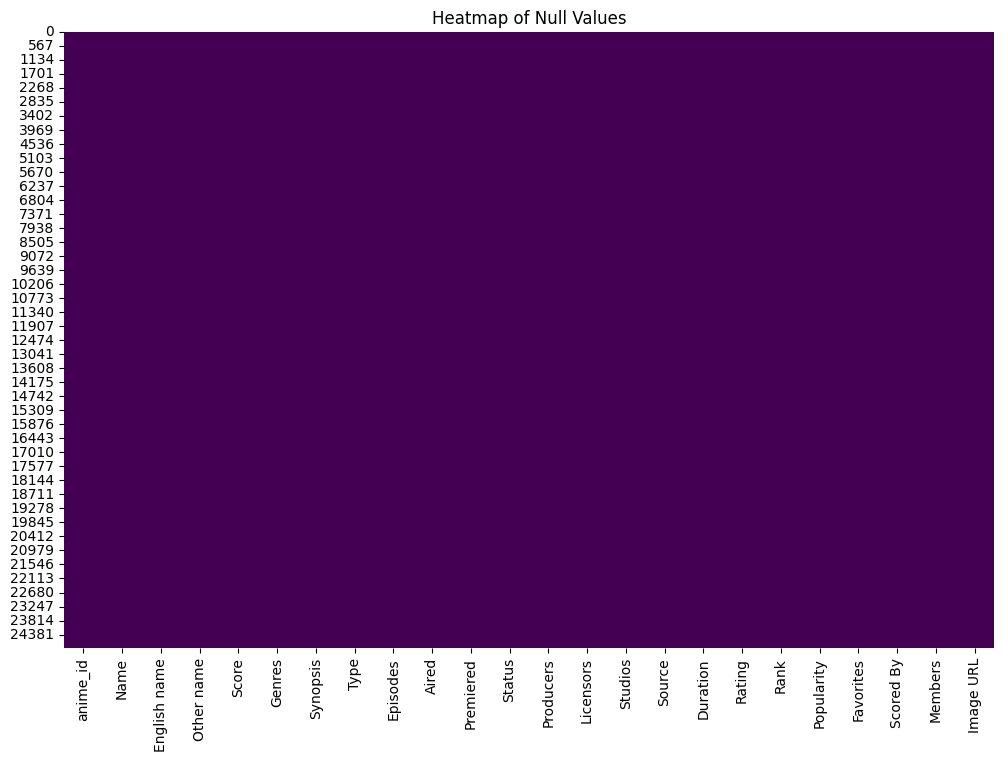

In [7]:
# Draw heatmap of null values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Null Values')
plt.show()

In [8]:
df.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status',
       'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
       'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL'],
      dtype='object')

In [9]:
df.sample(1)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
21053,48825,Kamiari Algorithm,UNKNOWN,神或アルゴリズム,6.79,UNKNOWN,Music video for Masayoshi Ooishi's Kamiari Alg...,Music,1,"Feb 25, 2021",...,TriF Studio,Original,3 min,PG-13 - Teens 13 or older,UNKNOWN,13748,2,345,715,https://cdn.myanimelist.net/images/anime/1444/...


In [10]:
df.shape

(24905, 24)

In [11]:
unknown_counts = (df == "UNKNOWN").sum()
print(unknown_counts)
columns_to_remove = unknown_counts[(unknown_counts > 1) & (unknown_counts.index != 'Genres')].index
df.drop(columns=columns_to_remove, inplace=True)

anime_id            0
Name                0
English name    14577
Other name        128
Score            9213
Genres           4929
Synopsis            0
Type               74
Episodes          611
Aired               0
Premiered       19399
Status              0
Producers       13350
Licensors       20170
Studios         10526
Source              0
Duration            0
Rating            669
Rank             4612
Popularity          0
Favorites           0
Scored By        9213
Members             0
Image URL           0
dtype: int64


In [15]:
df = df.sort_values(by='Favorites', ascending=False)

In [17]:
# Preprocess Name and Synopsis before concatenation
df['Name_Synopsis'] = df['Name'].str.strip() +" - " +df['Genres']+" - " + df['Synopsis'].str.strip()

In [18]:
# Create a new DataFrame with the specified columns
new_df = df[['anime_id', 'Name', 'Name_Synopsis']]

# Save the new DataFrame to a CSV file
new_df.to_csv('anime_subset.csv', index=False)

In [ ]:
new_df.shape

(24905, 3)